In [1]:
#flower Classification 
#The goal of this task is to develop a machine learning model that accurately classify Iris flowers into their respective species.
# analysis and generating report on it

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/codsoft-iris-flower21/IRIS.csv


**Data Exploration and Preprocessing**

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
# Load the Iris dataset
iris = pd.read_csv("/kaggle/input/codsoft-iris-flower21/IRIS.csv")


In [9]:
# Show the first few rows of the dataset
iris.head(11)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
iris.shape

(150, 5)

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Data Cleaning**

In [15]:
# Check NUll Value 
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
# Checking duplicate values
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [17]:
iris.duplicated().sum()

3

In [20]:
# Remove duplicate values
iris= iris.drop_duplicates()
iris.shape

(147, 5)

In [21]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

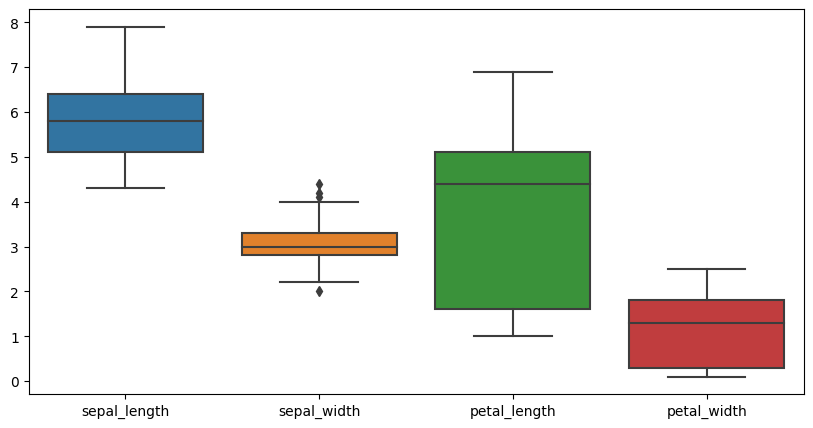

In [22]:
#Outliers detection
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(iris,ax=ax)

**Data Analysis**

In [23]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
iris['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

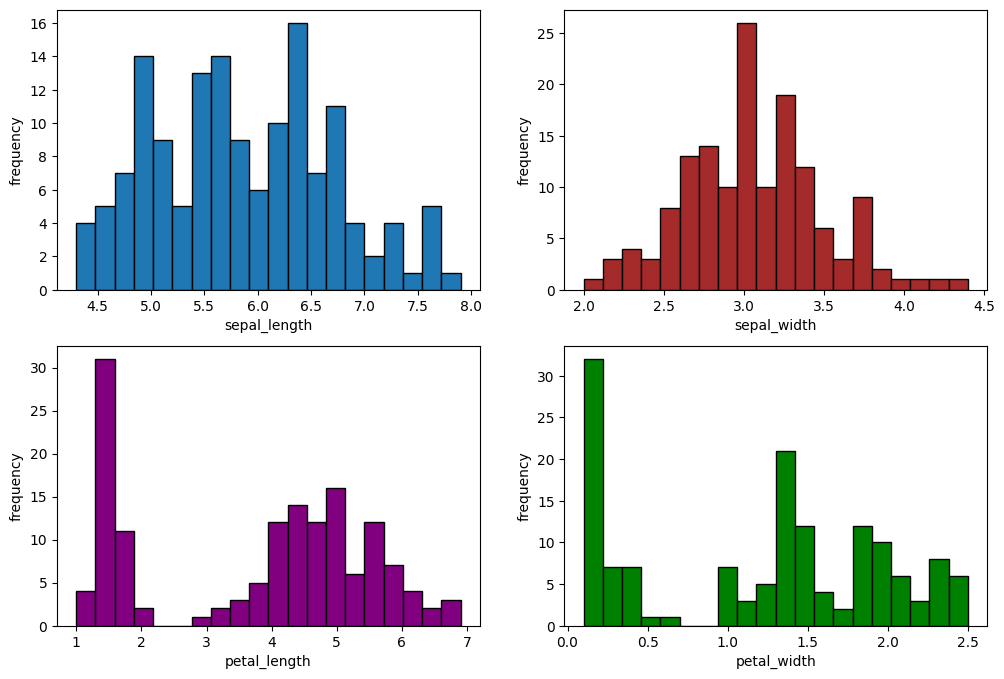

In [35]:
# Histogram plots for numerical features
fig,ax=plt.subplots(2,2, figsize=(12,8))

ax[0,0].hist(iris['sepal_length'],bins=20,edgecolor='black')
ax[0,0].set_xlabel('sepal_length')
ax[0,0].set_ylabel('frequency')

ax[0,1].hist(iris['sepal_width'],bins=20,edgecolor='black',color='brown')
ax[0,1].set_xlabel('sepal_width')
ax[0,1].set_ylabel('frequency')

ax[1,0].hist(iris['petal_length'],bins=20,edgecolor='black',color='purple')
ax[1,0].set_xlabel('petal_length')
ax[1,0].set_ylabel('frequency')

ax[1,1].hist(iris['petal_width'],bins=20,edgecolor='black',color='green')
ax[1,1].set_xlabel('petal_width')
ax[1,1].set_ylabel('frequency')
plt.show()

<Axes: xlabel='species', ylabel='count'>

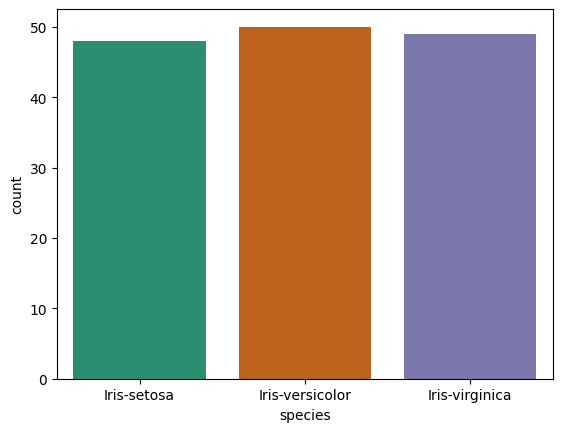

In [36]:
# Plotting the species data
sns.countplot(x = "species",data=iris,palette="Dark2")

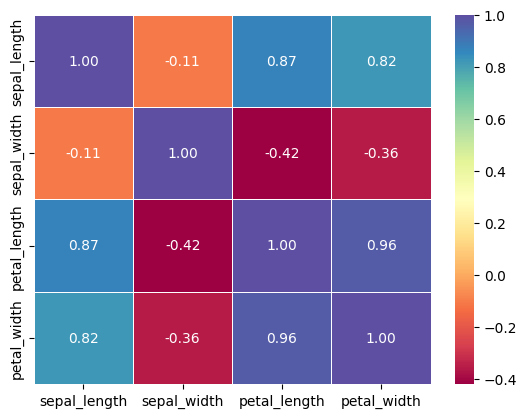

In [37]:
# Checking relationship between variables
fig,ax=plt.subplots()
sns.heatmap(iris.drop(columns='species').corr(), annot=True,cmap='Spectral',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

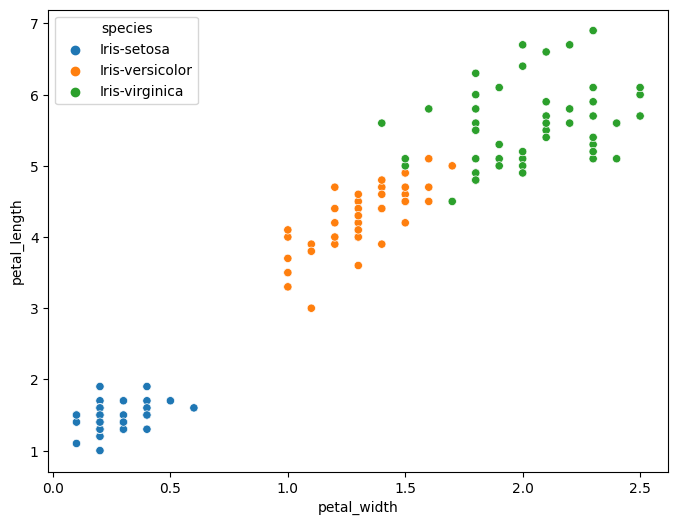

In [38]:
# Scatterplot for petal length and petal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=iris)
plt.show()

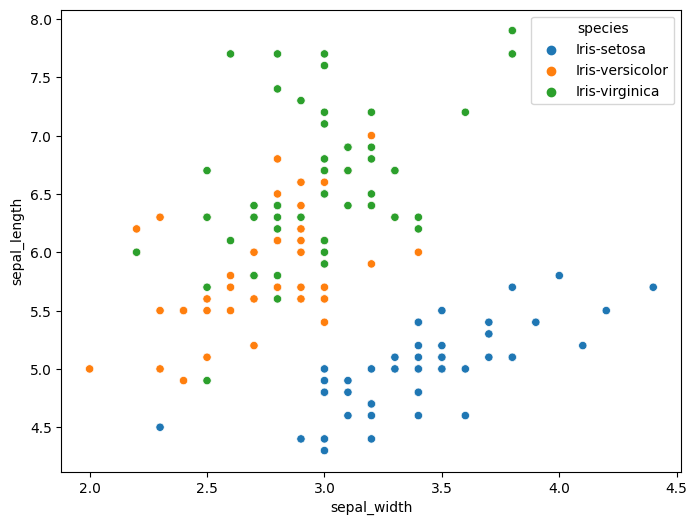

In [39]:
# Scatterplot for sepal length and sepal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="sepal_width",y="sepal_length",hue="species",data=iris)
plt.show()

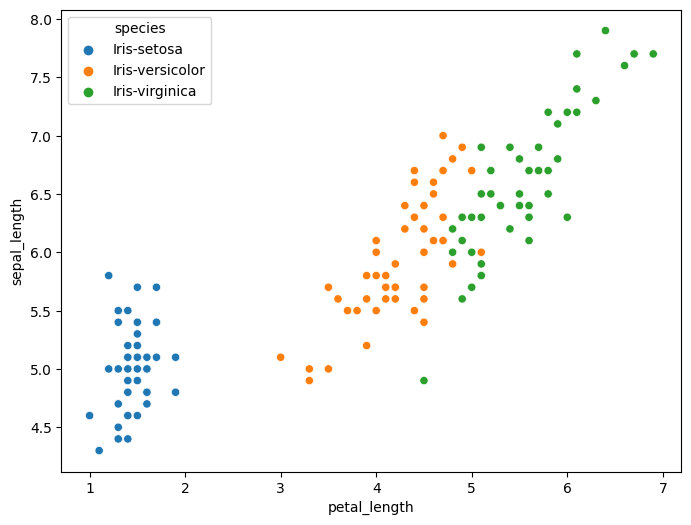

In [40]:
# Scatterplot for sepal length and petal length by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_length",y="sepal_length",hue="species",data=iris)
plt.show()


Label Encoder

In [52]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [53]:
iris['species']=label_encoder.fit_transform(iris['species'])

In [54]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [55]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= iris.drop('species',axis=1)
y=iris['species']

#Split dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
train_data= x_train.join(y_train)

In [56]:
train_data

,sepal_length,sepal_width,petal_length,petal_width,species
94,5.6,2.7,4.2,1.3,1
54,6.5,2.8,4.6,1.5,1
13,4.3,3.0,1.1,0.1,0
92,5.8,2.6,4.0,1.2,1
107,7.3,2.9,6.3,1.8,2
...,...,...,...,...,...
35,5.0,3.2,1.2,0.2,0
10,5.4,3.7,1.5,0.2,0
140,6.7,3.1,5.6,2.4,2
24,4.8,3.4,1.9,0.2,0


**Confusion Matrix:**
created and visualized using Seaborn's heatmap function

In [57]:
from sklearn.linear_model import LogisticRegression

#Build a Logisitc Regression model
fitted_model_lr = LogisticRegression()
#Train the model
fitted_model_lr.fit(x_train,y_train)
#Make predictions
y_pred_lr = fitted_model_lr.predict(x_test)

 Accuracy for LR: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



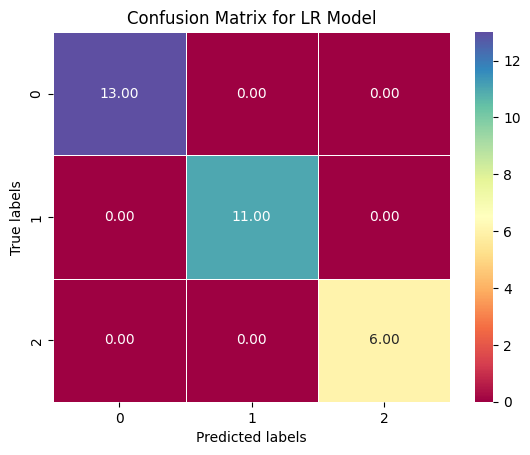

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model's performance evaluating
accuracy = accuracy_score(y_test, y_pred_lr)
print(f' Accuracy for LR: {accuracy:.4f}')
print(classification_report(y_test, y_pred_lr))
cf=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cf,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for LR Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

The Logistic Regression model performed exceptionally well on the iris flower classification task, achieving perfect accuracy, precision, recall, and F1-scores across all species. This indicates that the model effectively distinguished between the three iris species without any misclassifications in the test dataset

**2. K- Nearest Neighbors (KNN) Model**


In [59]:
from sklearn.neighbors import KNeighborsClassifier

#Build a KNN model
fitted_model_knn = KNeighborsClassifier()
#Train the model
fitted_model_knn.fit(x_train,y_train)
#Make predictions
y_pred_knn = fitted_model_knn.predict(x_test)

 Accuracy for KNN: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



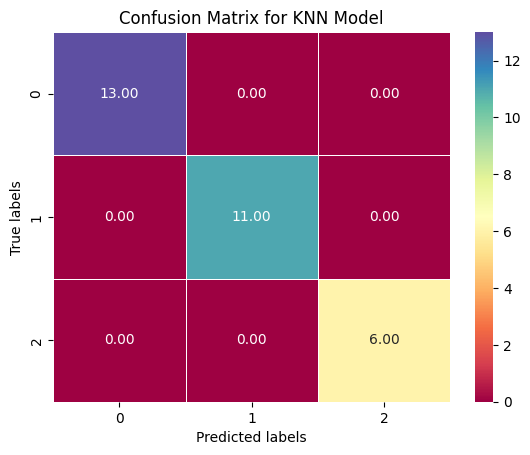

In [60]:
# Model's performance evaluating
accuracy1 = accuracy_score(y_test, y_pred_knn)
print(f' Accuracy for KNN: {accuracy1:.4f}')
print(classification_report(y_test, y_pred_knn))
cf1=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cf1,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**3. Support Vector Machine (SVM) Model**

In [61]:
from sklearn.svm import SVC

#Build a KNN model
fitted_model_svm = SVC()
#Train the model
fitted_model_svm.fit(x_train,y_train)
#Make predictions
y_pred_svm = fitted_model_svm.predict(x_test)

 Accuracy for SVM: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



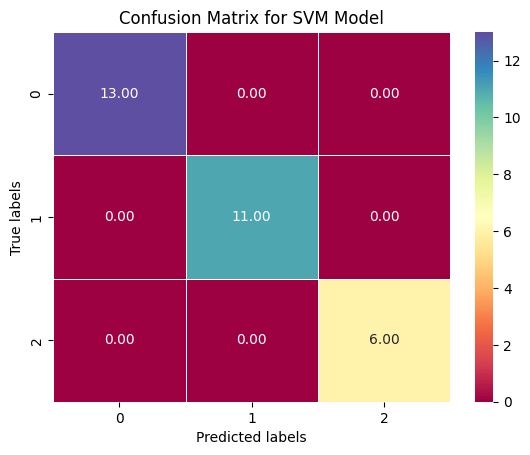

In [62]:
# Model's performance evaluating
accuracy2 = accuracy_score(y_test, y_pred_svm)
print(f' Accuracy for SVM: {accuracy2:.4f}')
print(classification_report(y_test, y_pred_svm))
cf2=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cf2,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**4. Decision Tree Model**

In [63]:
from sklearn.tree import DecisionTreeClassifier

#Build a KNN model
fitted_model_dt = DecisionTreeClassifier()
#Train the model
fitted_model_dt.fit(x_train,y_train)
#Make predictions
y_pred_dt = fitted_model_dt.predict(x_test)

 Accuracy for DT: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



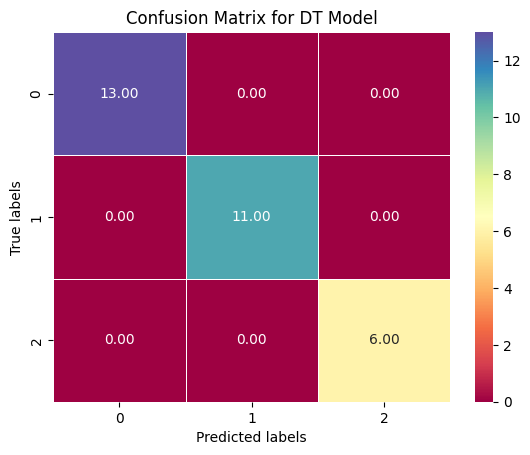

In [64]:
# Model's performance evaluating
accuracy3 = accuracy_score(y_test, y_pred_dt)
print(f' Accuracy for DT: {accuracy3:.4f}')
print(classification_report(y_test, y_pred_dt))
cf3=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cf3,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for DT Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Conclusion:-


Overall, the results demonstrate the effectiveness of the Logistic Regression model for classifying iris flower species based on sepal and petal measurements, showing a perfect balance between precision, recall, and F1-score.


Accuracy:

1.0000 (100%): The model correctly classified all instances in the test set.
Precision:

Setosa (0): 1.00 — All predicted setosa were correct.
Versicolor (1): 1.00 — All predicted versicolor were correct.
Virginica (2): 1.00 — All predicted virginica were correct.
Macro Average: 1.00 — Average precision across all classes.
Weighted Average: 1.00 — Average precision considering the number of instances in each class.
Recall:

Setosa (0): 1.00 — All actual setosa were predicted correctly.
Versicolor (1): 1.00 — All actual versicolor were predicted correctly.
Virginica (2): 1.00 — All actual virginica were predicted correctly.
Macro Average: 1.00 — Average recall across all classes.
Weighted Average: 1.00 — Average recall considering the number of instances in each class.
F1-Score:

Setosa (0): 1.00
Versicolor (1): 1.00
Virginica (2): 1.00
Macro Average: 1.00 — Average F1-score across all classes.
Weighted Average: 1.00 — Average F1-score considering the number of instances in each class.
Support:

Setosa (0): 13 instances
Versicolor (1): 11 instances
Virginica (2): 6 instances
Total Instances: 30
Interpretation
The LR model achieved perfect classification across all species, indicating excellent model performance on the Iris dataset.
Important Notes:
While this performance is impressive, it is crucial to recognize that the Iris dataset is simple and may not be representative of more complex real-world scenarios.
Always validate model performance on various datasets and consider potential overfitting, especially when achieving perfect accuracy.






